<a href="https://colab.research.google.com/github/benythiny/LLMs-from-scratch/blob/main/CLIPSeg/Zero_shot_image_segmentation_with_CLIPSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up environment

Let's first install 🤗 Transformers. We install from source as the model is brand new at the moment of writing.

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Load image

Next, let's load an image.

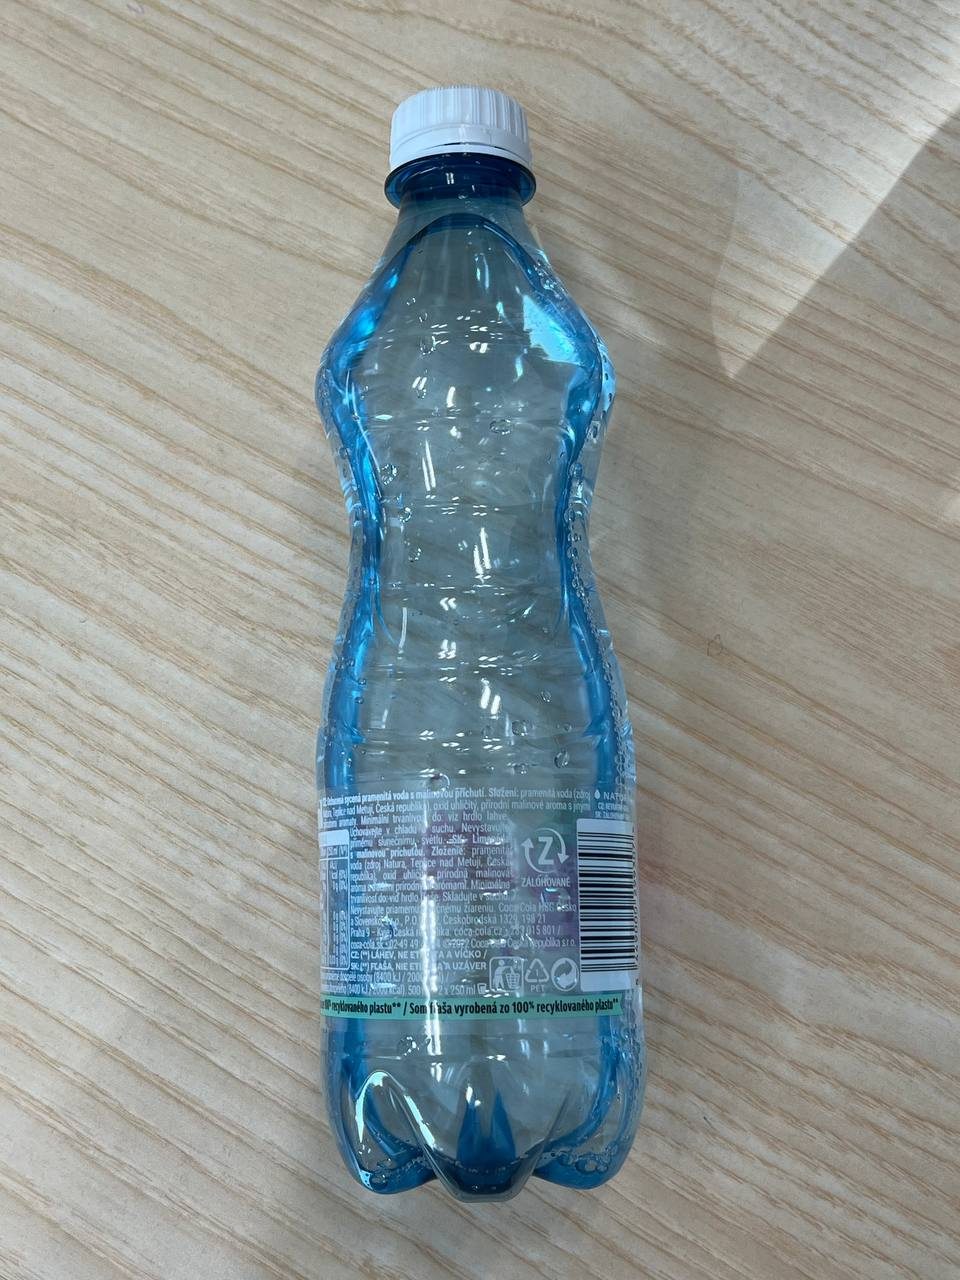

In [20]:
from PIL import Image
import requests

# url = "https://github.com/timojl/clipseg/blob/master/example_image.jpg?raw=true"
# url = 'test_clamp.jpg'
url = 'bottle.jpg'
image = Image.open(url)
# image = Image.open(requests.get(url, stream=True).raw)
image

## Load model

Next, let's load the model and its processor from the [hub](https://huggingface.co/CIDAS/clipseg-rd64-refined).

In [21]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Prepare image and texts for model

The image and a few prompts can be prepared for the model using the processor.

In [22]:
# prompts = ["a glass", "something to fill", "wood", "a jar"]
# prompts = ["clamp", "gripping points", "somewhere to grip this object", "handle"]
prompts = ["a bottle", "lid", "gripping points", "narrow part of bottle"]

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

Unused or unrecognized kwargs: padding.


## Forward pass

Next, let's run a forward pass and visualize the predictions the model made.

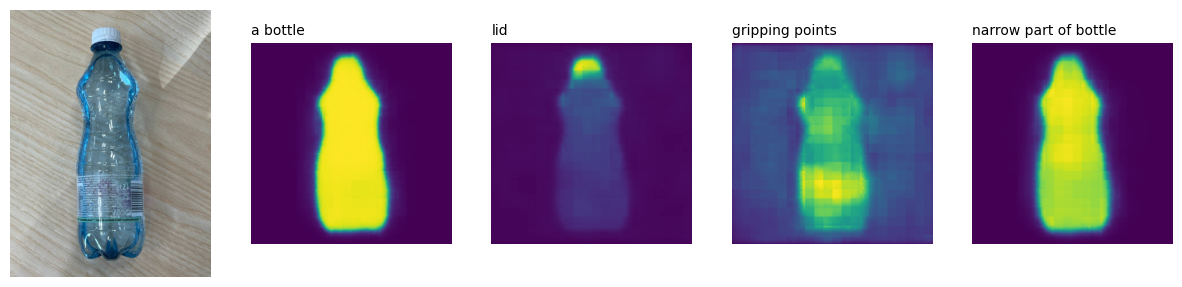

In [23]:
import torch
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

As can be seen, the model is capable of segmenting images based on text prompts in a zero-shot manner. Pretty cool, huh?

## Convert to binary mask

To convert to a binary mask, I borrow some logic from [here](https://github.com/amrrs/stable-diffusion-prompt-inpainting). One can apply a sigmoid activation function on the predicted mask and use some OpenCV (cv2) to turn it into a binary mask.

In [6]:
filename = f"mask.png"
# here we save the second mask
plt.imsave(filename,torch.sigmoid(preds[1][0]))

In [7]:
import cv2

img2 = cv2.imread(filename)

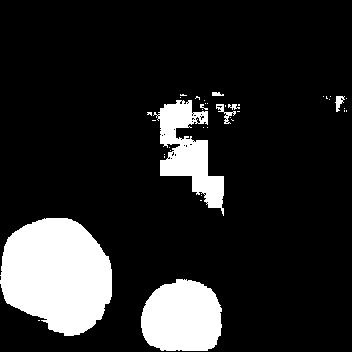

In [8]:
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)

Unused or unrecognized kwargs: padding.


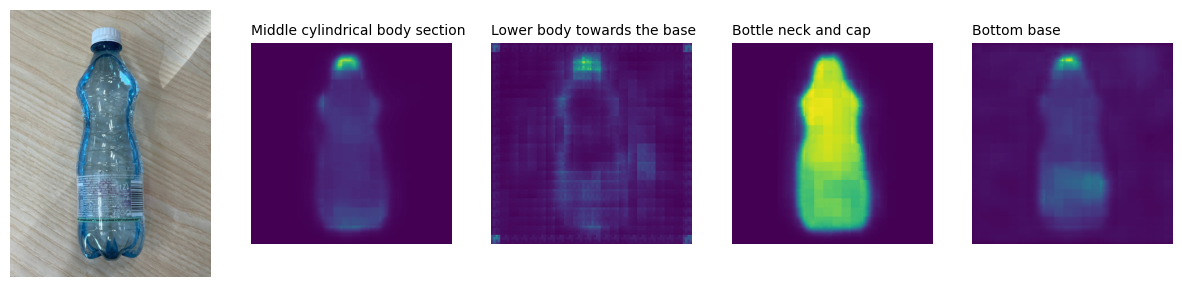

In [47]:
url = 'bottle.jpg'
# prompts = ["a bottle", "lid", "gripping points", "narrow part of bottle"]
prompts = ["Middle cylindrical body section: This is the widest part of the bottle, providing a larger surface area for a stable grip.",
"Lower body towards the base: The bottle's shape starts narrowing down at this point, making it a less ideal gripping location.",
"Bottle neck and cap: This narrow section may be too thin for secure gripping and could risk slippage or damage.",
"Bottom base: Most bottles are designed to stand stably on this flat base, so gripping here may be challenging and unstable."]

prompts = ["Middle cylindrical body section", "Lower body towards the base",
           "Bottle neck and cap", "Bottom base"]
image = Image.open(url)
image

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

Unused or unrecognized kwargs: padding.


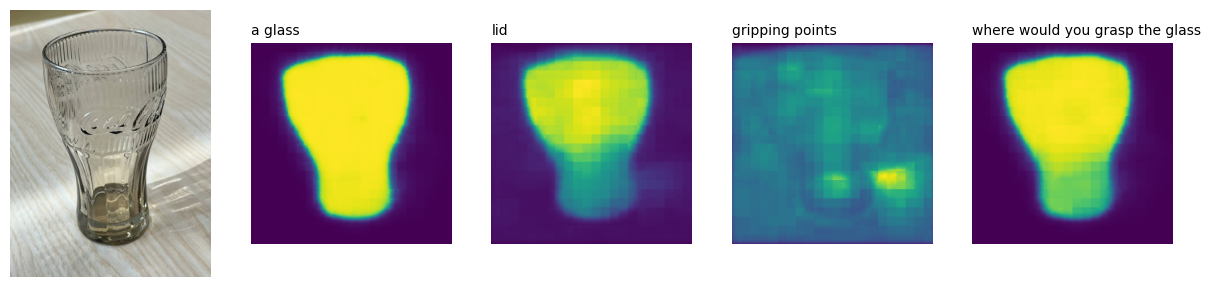

In [27]:
url = 'glass.jpg'
prompts = ["a glass", "lid", "gripping points", "where would you grasp the glass"]

image = Image.open(url)
image

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

Unused or unrecognized kwargs: padding.


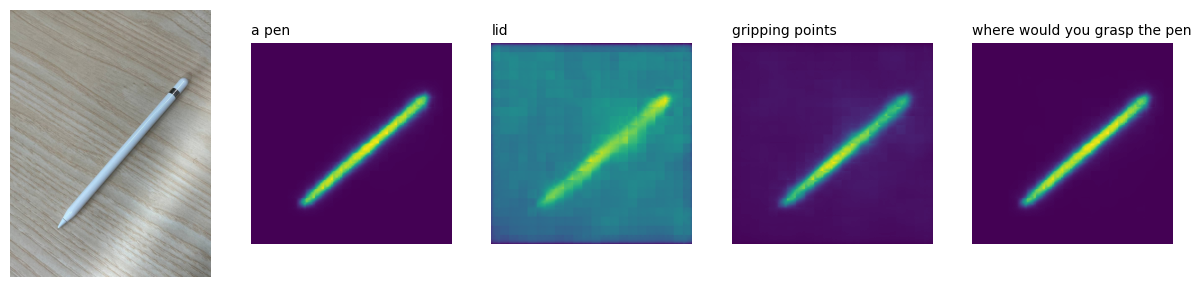

In [28]:
url = 'pen.jpg'
prompts = ["a pen", "lid", "gripping points", "where would you grasp the pen"]

image = Image.open(url)
image

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

Unused or unrecognized kwargs: padding.


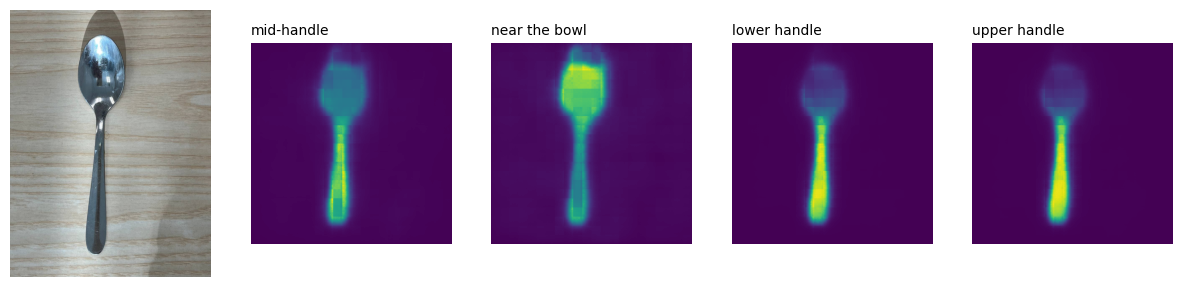

In [44]:
url = 'spoon.jpg'
# prompts = ["a spoon", "handle", "gripping points", "where would you grasp the spoon to eat soup"]
prompts = ["mid-handle", "near the bowl", "lower handle", "upper handle"]

image = Image.open(url)
image

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

Unused or unrecognized kwargs: padding.


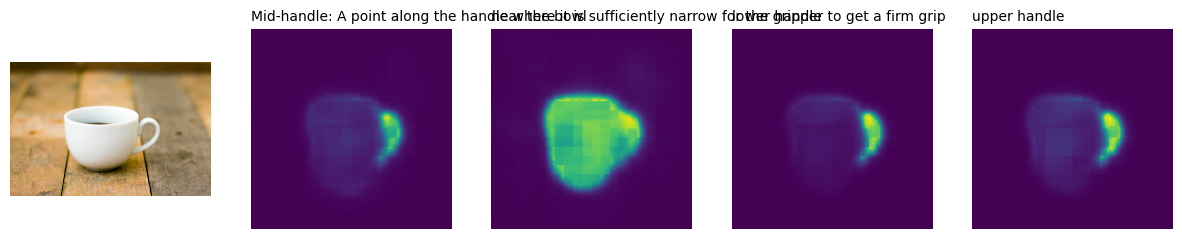

In [43]:
url = 'cup.jpg'
# prompts = ["wood", "handle", "gripping points", "where would you grasp the cup"]
prompts = ["Bowl", "Neck", "Handle base", "Handle tip"]
prompts = ["Mid-handle: A point along the handle where it is sufficiently narrow for the gripper to get a firm grip", "near the bowl", "lower handle", "upper handle"]
image = Image.open(url)
image

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];




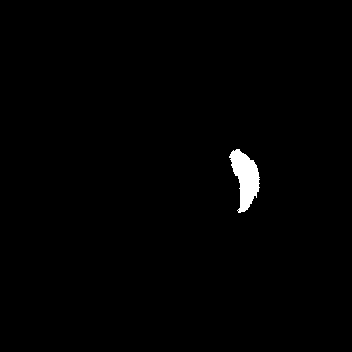

In [40]:
### save binary mask
filename = f"mask.png"
# here we save the second mask
plt.imsave(filename,torch.sigmoid(preds[1][0]))
img2 = cv2.imread(filename)
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 140, 255, cv2.THRESH_BINARY)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)

Unused or unrecognized kwargs: padding.


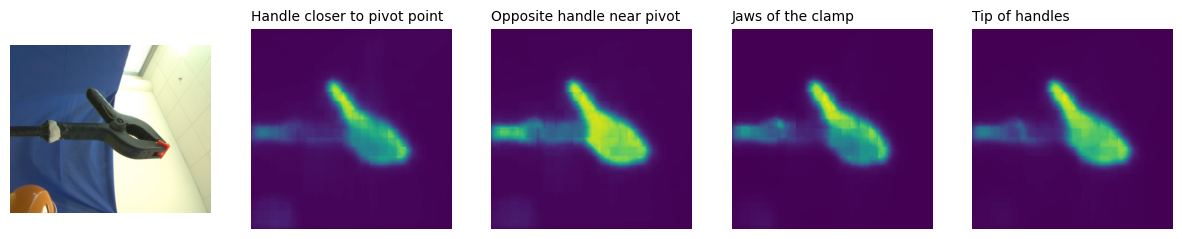

In [48]:
url = "test_clamp.jpg"
prompts = ["Handle closer to pivot point", "Opposite handle near pivot", "Jaws of the clamp", "Tip of handles"]
image = Image.open(url)
image

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];